In [ ]:
##Part 1: Set-up and Data Preparation

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\Shrabani.Personal\Data Science Course\Self Project\Data\test_TimeSeriesAnalysis.csv")
df.head()

,Date,store,product,number_sold
0,1/1/2019,0,0,845
1,1/2/2019,0,0,851
2,1/3/2019,0,0,840
3,1/4/2019,0,0,842
4,1/5/2019,0,0,845


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25550 entries, 0 to 25549
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         25550 non-null  object
 1   store        25550 non-null  int64 
 2   product      25550 non-null  int64 
 3   number_sold  25550 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 798.6+ KB


In [6]:
df.shape

(25550, 4)

In [8]:
# Import and execute method for suppressing warnings
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore', ConvergenceWarning)

In [10]:
df['Date']=pd.to_datetime(df['Date'])
df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845


In [12]:
df.sort_values(by='Date', inplace=True)
df.head()

,Date,store,product,number_sold
0,2019-01-01,0,0,845
13505,2019-01-01,3,7,357
22265,2019-01-01,6,1,904
13870,2019-01-01,3,8,273
14235,2019-01-01,3,9,326


In [14]:
df.reset_index(drop=True, inplace=True)
df.head()


,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-01,3,7,357
2,2019-01-01,6,1,904
3,2019-01-01,3,8,273
4,2019-01-01,3,9,326


In [16]:
#set the  Date column as the index of the data

df.set_index('Date', inplace=True)
df.head()

,store,product,number_sold
Date,,,
2019-01-01,0,0,845
2019-01-01,3,7,357
2019-01-01,6,1,904
2019-01-01,3,8,273
2019-01-01,3,9,326


In [18]:
df.loc['2019-01-01']

,store,product,number_sold
Date,,,
2019-01-01,0,0,845
2019-01-01,3,7,357
2019-01-01,6,1,904
2019-01-01,3,8,273
2019-01-01,3,9,326
...,...,...,...
2019-01-01,2,5,948
2019-01-01,6,3,803
2019-01-01,5,6,953


In [22]:
df=df.groupby(pd.Grouper(freq ='D')).sum()

In [24]:
df.head()

,store,product,number_sold
Date,,,
2019-01-01,210,315,55221
2019-01-02,210,315,55287
2019-01-03,210,315,55302
2019-01-04,210,315,55407
2019-01-05,210,315,55289


In [26]:
df.shape

(365, 3)

In [28]:
df.drop(columns=['store' , 'product'], inplace=True)
df.head()

,number_sold
Date,
2019-01-01,55221
2019-01-02,55287
2019-01-03,55302
2019-01-04,55407
2019-01-05,55289


<Axes: xlabel='Date'>

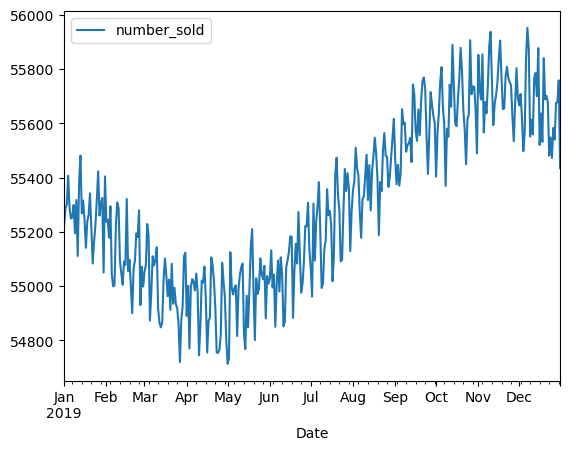

In [30]:
df.plot()

In [ ]:
#Part 2: Stationary Analysis

In [32]:
from statsmodels.tsa.stattools import adfuller
result=adfuller(df['number_sold'])

In [34]:
result[1] ##this is the p_value of adfuller test

0.9011003594036484

In [36]:
# If the p-value is less than 0.05, then the data is Stationary, otherwise our data is non-Stationary.
df.shape

(365, 1)

In [38]:
df_train =df[0:290]
df_test=df[290:]
df_train


,number_sold
Date,
2019-01-01,55221
2019-01-02,55287
2019-01-03,55302
2019-01-04,55407
2019-01-05,55289
...,...
2019-10-13,55889
2019-10-14,55739
2019-10-15,55600


Text(0.5, 1.0, 'Sales Data')

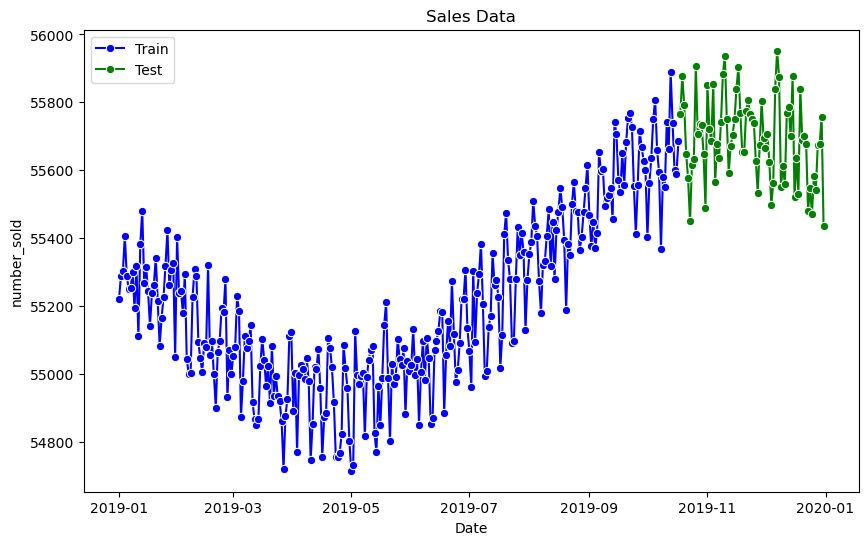

In [42]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df_train, x='Date', y='number_sold', marker='o', color='blue', label='Train')
sns.lineplot(data=df_test, x= 'Date', y='number_sold', marker='o', color='green', label='Test')
plt.title('Sales Data')


In [ ]:
#Time Series Transformation

#Box-cox Transformation(BCT)



In [46]:
from scipy.stats import boxcox
df_boxcox= pd.Series(boxcox(df_train['number_sold'], lmbda=0), index=df_train.index)
df_boxcox

Date
2019-01-01    10.919099
2019-01-02    10.920293
2019-01-03    10.920564
2019-01-04    10.922461
2019-01-05    10.920329
                ...    
2019-10-13    10.931123
2019-10-14    10.928435
2019-10-15    10.925938
2019-10-16    10.925741
2019-10-17    10.927466
Freq: D, Length: 290, dtype: float64

Text(0.5, 1.0, 'Original Data')

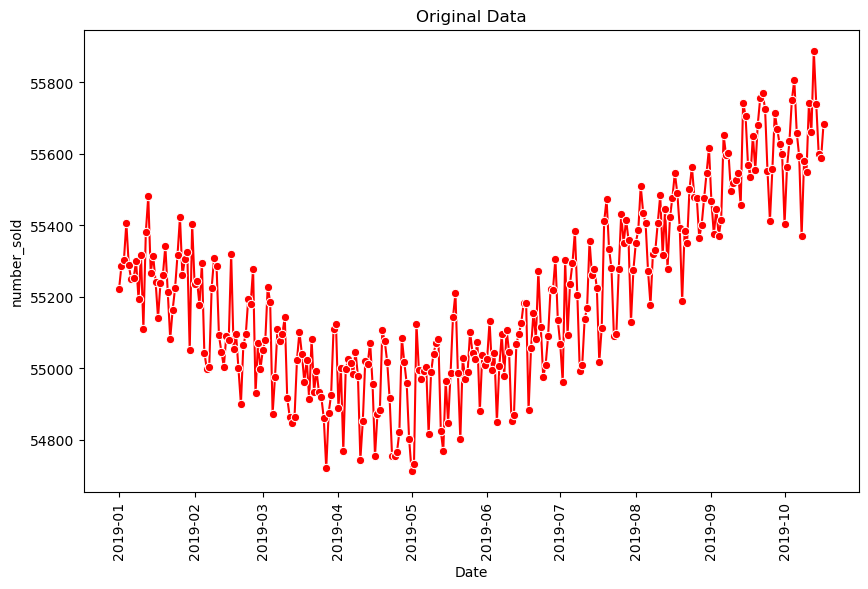

In [48]:
plt.figure(figsize=(10, 6))

# Plot 1: Original Data

sns.lineplot(data=df_train, x='Date', y='number_sold', marker='o', color='red')
plt.xticks(rotation=90)
plt.title('Original Data')




Text(0.5, 1.0, 'Box-Cox Transformed Data [lambda = 0]')

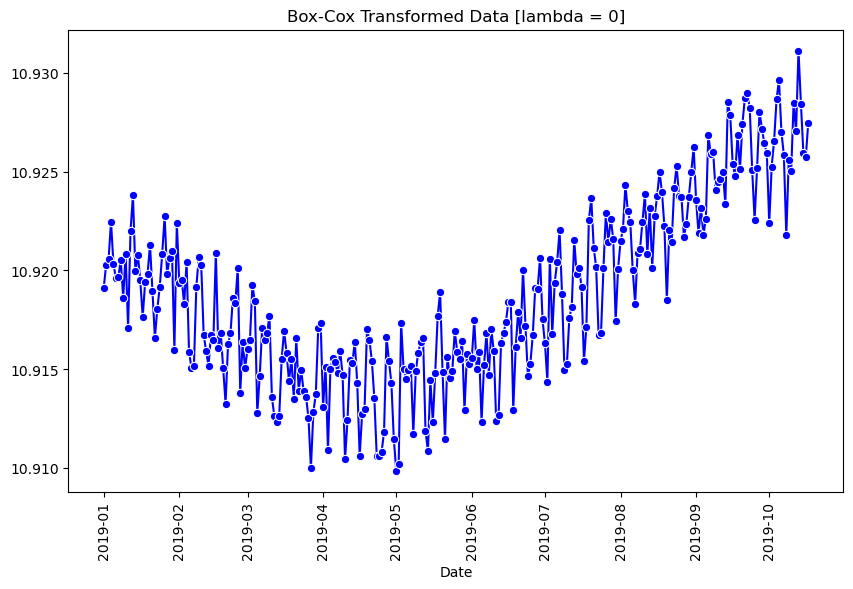

In [52]:
# Plot 2: Box-Cox Transformed Data

plt.figure(figsize=(10,6))

sns.lineplot(x=df_boxcox.index, y=df_boxcox.values, marker='o', color='blue')
plt.xticks(rotation=90)
plt.title('Box-Cox Transformed Data [lambda = 0]')



In [ ]:
#Differencing

In [54]:
df_differenced=df_train['number_sold'].diff()

In [ ]:
# Plot the original time series data and its first-order differenced version

Text(0.5, 1.0, 'Original Data')

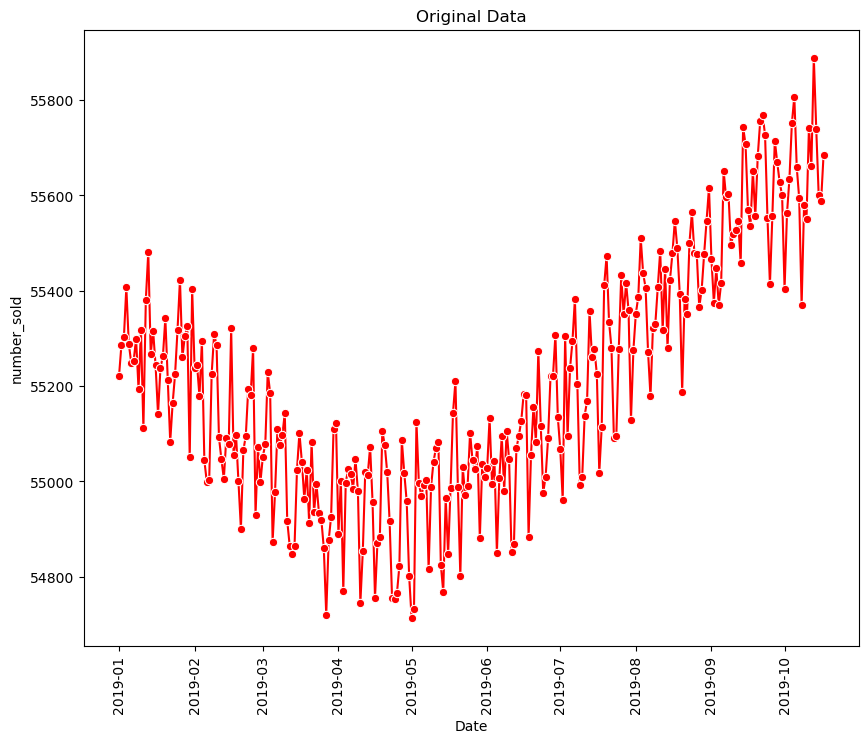

In [60]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_train, x='Date', y='number_sold', marker='o', color='red')
plt.xticks(rotation=90)
plt.title('Original Data')


Text(0.5, 1.0, 'Differenced Data [Order = 1]')

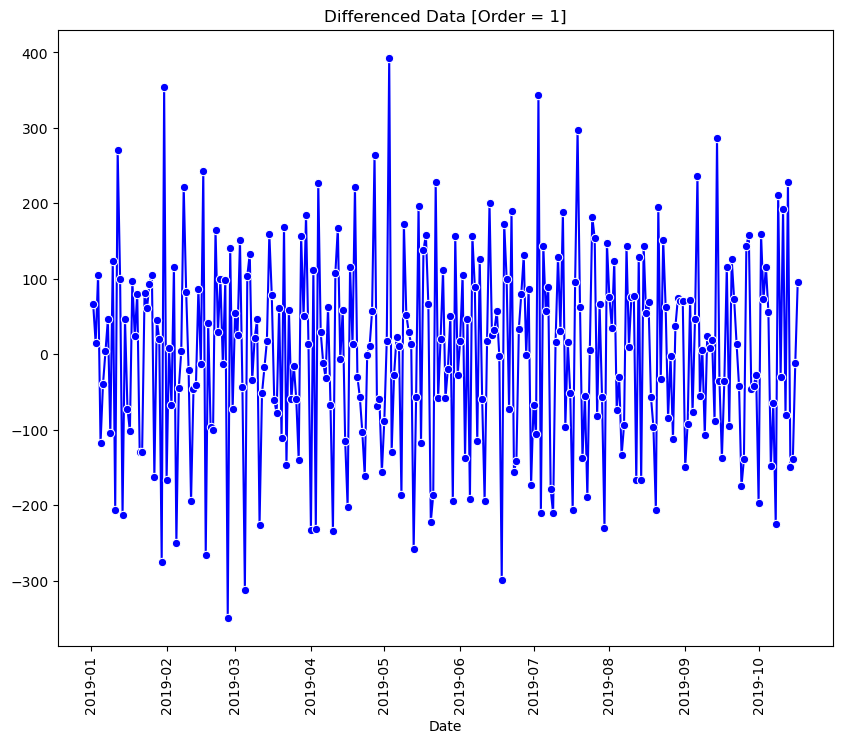

In [66]:
plt.figure(figsize=(10,8))
sns.lineplot(x = df_differenced.index, y = df_differenced.values, marker = 'o', color = 'blue')
plt.xticks(rotation = 90)
plt.title('Differenced Data [Order = 1]')



In [ ]:
#Differencing+Box-cox Transformation

In [68]:
df_boxcox=pd.Series(boxcox(df_train['number_sold'], lmbda=0), index=df_train.index)
df_boxcox_diff = df_boxcox.diff()

In [ ]:
# Plot the original time series data and its first-order differenced version

Text(0.5, 1.0, 'Original Data')

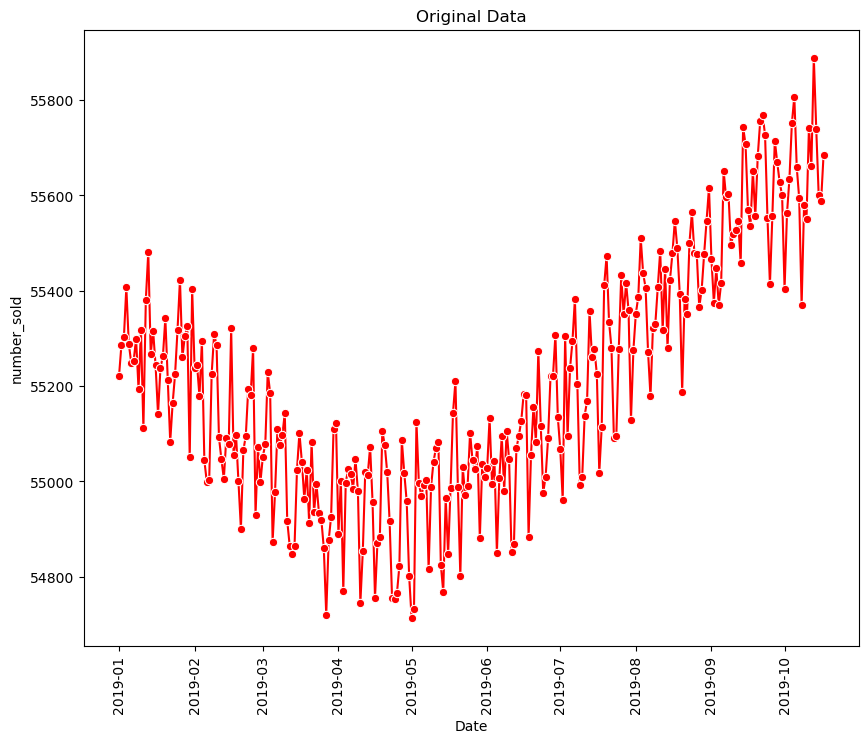

In [70]:
plt.figure(figsize=(10,8))
sns.lineplot(data=df_train, x='Date', y='number_sold', marker='o', color='red')
plt.xticks(rotation=90)
plt.title('Original Data')


Text(0.5, 1.0, 'Transformed Data [lambda = 0 and differencing order = 1]')

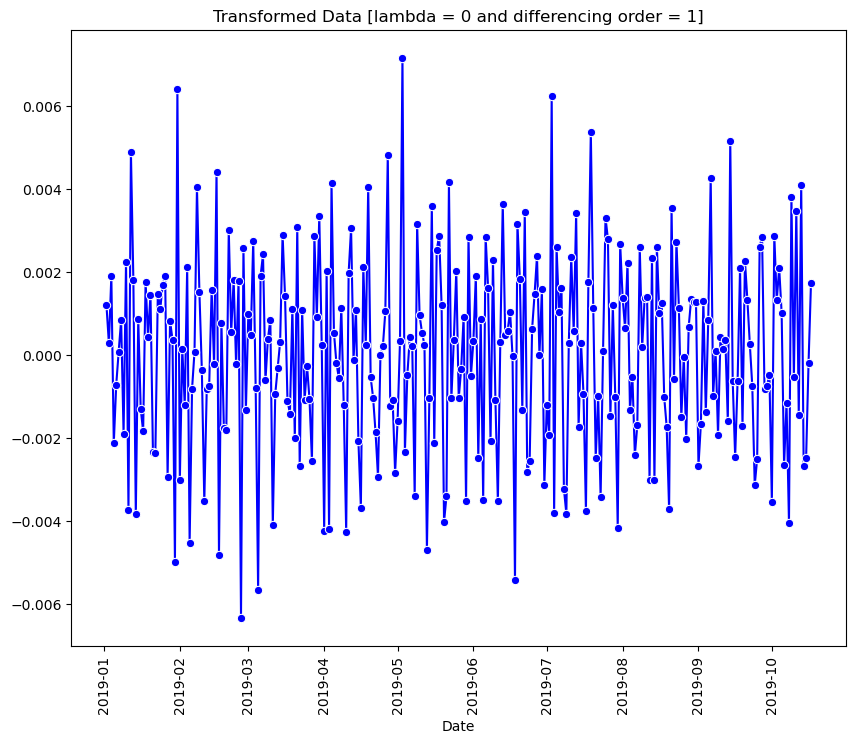

In [74]:
plt.figure(figsize=(10,8))
sns.lineplot(x=df_boxcox_diff.index, y=df_boxcox_diff.values, marker='o', color='blue')
plt.xticks(rotation=90)
plt.title('Transformed Data [lambda = 0 and differencing order = 1]')


In [ ]:
#Part 2: Stationary Analysis after Transformation

In [76]:
result_after_transformation = adfuller(df_boxcox_diff[1:])

In [78]:
result_after_transformation[1]

0.003803470652137155

In [ ]:
#Now the p-value is less than 0.05, then the data is Stationary.

In [ ]:
#Seasonal decomposition of the number_sold column before transformation

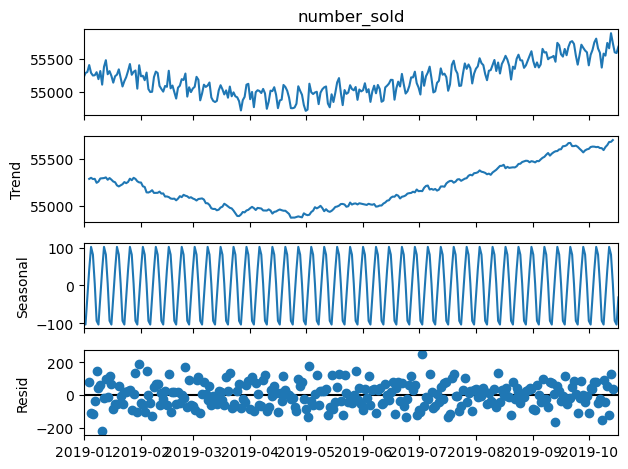

In [82]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_results = seasonal_decompose(df_train['number_sold'])
decompose_results.plot();

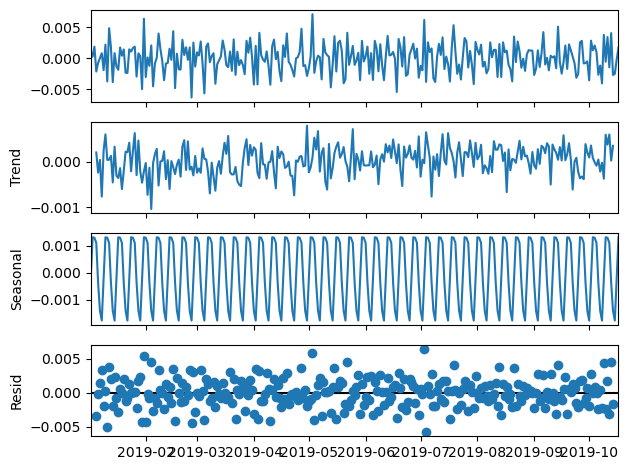

In [86]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompose_results = seasonal_decompose(df_boxcox_diff[1:])
decompose_results.plot();

In [ ]:
#Autocorrelation Plots

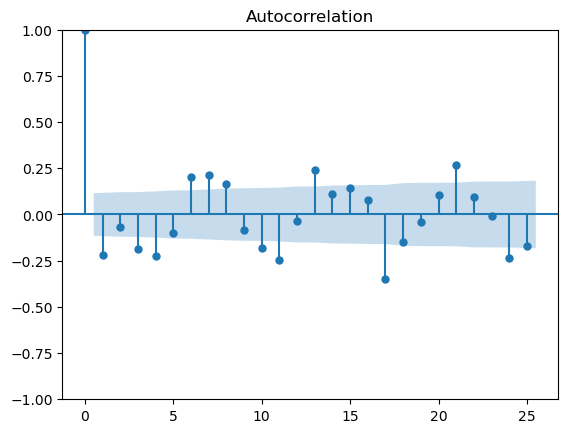

In [88]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_boxcox_diff[1:]);

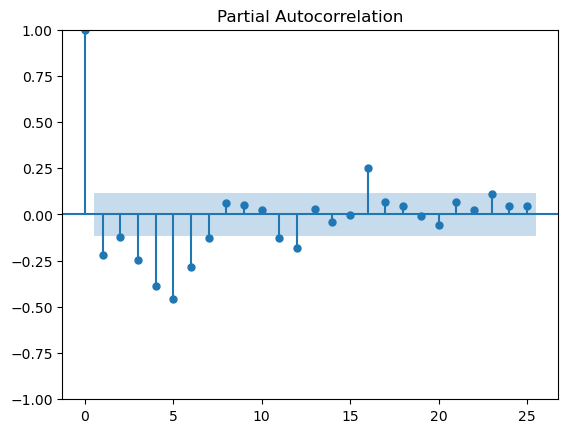

In [90]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(df_boxcox_diff[1:]);

In [ ]:
#AutoRegressive Models

#Auto Regressive Method

In [92]:
from statsmodels.tsa.arima.model import ARIMA
ar_model = ARIMA(df_boxcox_diff, order = (1, 0, 0))
ar_model = ar_model.fit()


In [96]:
train_len=290
ar_model_preds = ar_model.predict(start = train_len, end = len(df)-1)
ar_model_preds

2019-10-18   -0.000350
2019-10-19    0.000110
2019-10-20    0.000008
2019-10-21    0.000031
2019-10-22    0.000026
                ...   
2019-12-27    0.000027
2019-12-28    0.000027
2019-12-29    0.000027
2019-12-30    0.000027
2019-12-31    0.000027
Freq: D, Name: predicted_mean, Length: 75, dtype: float64

In [98]:
df_test

,number_sold
Date,
2019-10-18,55765
2019-10-19,55878
2019-10-20,55793
2019-10-21,55649
2019-10-22,55576
...,...
2019-12-27,55540
2019-12-28,55675
2019-12-29,55677


In [100]:
# Append the predictions with 'df_boxcox_diff' to prepare the data for inverse transformation
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])
df_boxcox_diff_preds

2019-01-01         NaN
2019-01-02    0.001194
2019-01-03    0.000271
2019-01-04    0.001897
2019-01-05   -0.002132
                ...   
2019-12-27    0.000027
2019-12-28    0.000027
2019-12-29    0.000027
2019-12-30    0.000027
2019-12-31    0.000027
Freq: D, Length: 365, dtype: float64

In [102]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum() #cummulative series
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0]) #initial value adjustment

In [104]:
df_preds = np.exp(df_boxcox_preds)
df_preds

2019-01-01             NaN
2019-01-02    55287.000000
2019-01-03    55302.000000
2019-01-04    55407.000000
2019-01-05    55289.000000
                  ...     
2019-12-27    55773.374866
2019-12-28    55774.862625
2019-12-29    55776.350423
2019-12-30    55777.838261
2019-12-31    55779.326139
Freq: D, Length: 365, dtype: float64

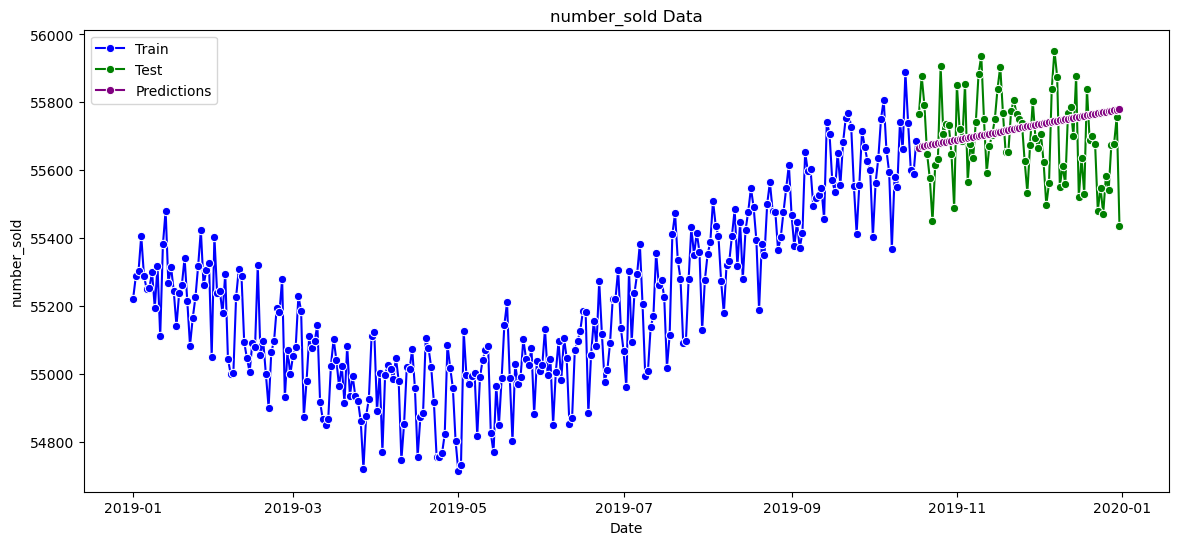

In [106]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'number_sold', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'number_sold', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('number_sold Data');

In [108]:
## Import 'mean_squared_error' from 'sklearn' for error computations
from sklearn.metrics import mean_squared_error

# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['number_sold'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Model': 'AR', 'RMSE': rmse})

performance_df.set_index('Model', inplace = True)

performance_df

,RMSE
Model,
AR,138.37


In [ ]:
#Autoregressive integrated moving average (ARIMA) Method

In [110]:
arima_model = ARIMA(df_boxcox, order = (1, 0, 1))
arima_model = arima_model.fit()

In [114]:
train_len = 290
arima_model_preds = arima_model.predict(start = train_len, end = len(df)-1)
arima_model_preds

2019-10-18    10.926163
2019-10-19    10.925606
2019-10-20    10.925092
2019-10-21    10.924618
2019-10-22    10.924182
                ...    
2019-12-27    10.919106
2019-12-28    10.919104
2019-12-29    10.919102
2019-12-30    10.919101
2019-12-31    10.919100
Freq: D, Name: predicted_mean, Length: 75, dtype: float64

In [116]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, arima_model_preds])

df_boxcox_preds

2019-01-01    10.919099
2019-01-02    10.920293
2019-01-03    10.920564
2019-01-04    10.922461
2019-01-05    10.920329
                ...    
2019-12-27    10.919106
2019-12-28    10.919104
2019-12-29    10.919102
2019-12-30    10.919101
2019-12-31    10.919100
Freq: D, Length: 365, dtype: float64

In [119]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)
df_preds

2019-01-01    55221.000000
2019-01-02    55287.000000
2019-01-03    55302.000000
2019-01-04    55407.000000
2019-01-05    55289.000000
                  ...     
2019-12-27    55221.404994
2019-12-28    55221.306386
2019-12-29    55221.215546
2019-12-30    55221.131863
2019-12-31    55221.054773
Freq: D, Length: 365, dtype: float64

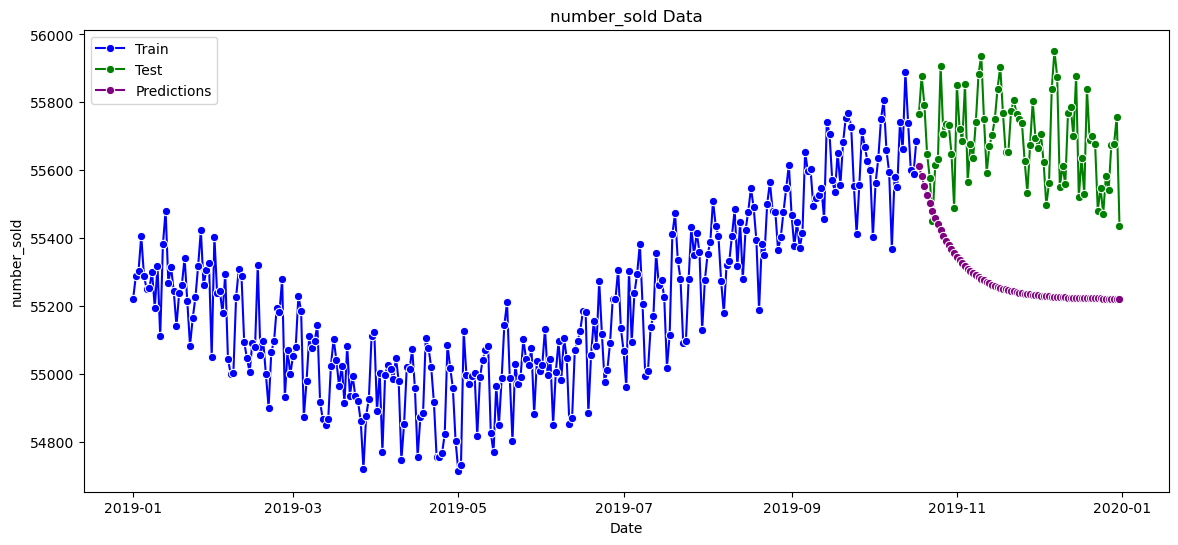

In [125]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'number_sold', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'number_sold', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('number_sold Data');

In [127]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['number_sold'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,138.37
ARIMA,432.57


In [ ]:
#SARIMA (Seasonal AutoRegressive Integrated Moving Average) Method



In [129]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(df_boxcox, order = (1, 0, 1), seasonal_order = (1,0,1,12))
sarima_model = sarima_model.fit()

In [131]:
# Obtain predictions from the SARIMA model for the testing data indices
train_len = 290
sarima_model_preds = sarima_model.predict(start = train_len, end = len(df)-1)
sarima_model_preds


2019-10-18    10.924222
2019-10-19    10.926003
2019-10-20    10.929396
2019-10-21    10.928996
2019-10-22    10.924510
                ...    
2019-12-27    10.929656
2019-12-28    10.936112
2019-12-29    10.930442
2019-12-30    10.932029
2019-12-31    10.935211
Freq: D, Name: predicted_mean, Length: 75, dtype: float64

In [133]:
# Append the predictions with 'df_boxcox' to prepare the data for inverse transformation
df_boxcox_preds = pd.concat([df_boxcox, sarima_model_preds])
df_boxcox_preds

2019-01-01    10.919099
2019-01-02    10.920293
2019-01-03    10.920564
2019-01-04    10.922461
2019-01-05    10.920329
                ...    
2019-12-27    10.929656
2019-12-28    10.936112
2019-12-29    10.930442
2019-12-30    10.932029
2019-12-31    10.935211
Freq: D, Length: 365, dtype: float64

In [137]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)
df_preds

2019-01-01    55221.000000
2019-01-02    55287.000000
2019-01-03    55302.000000
2019-01-04    55407.000000
2019-01-05    55289.000000
                  ...     
2019-12-27    55807.074425
2019-12-28    56168.528826
2019-12-29    55850.982056
2019-12-30    55939.680119
2019-12-31    56117.938182
Freq: D, Length: 365, dtype: float64

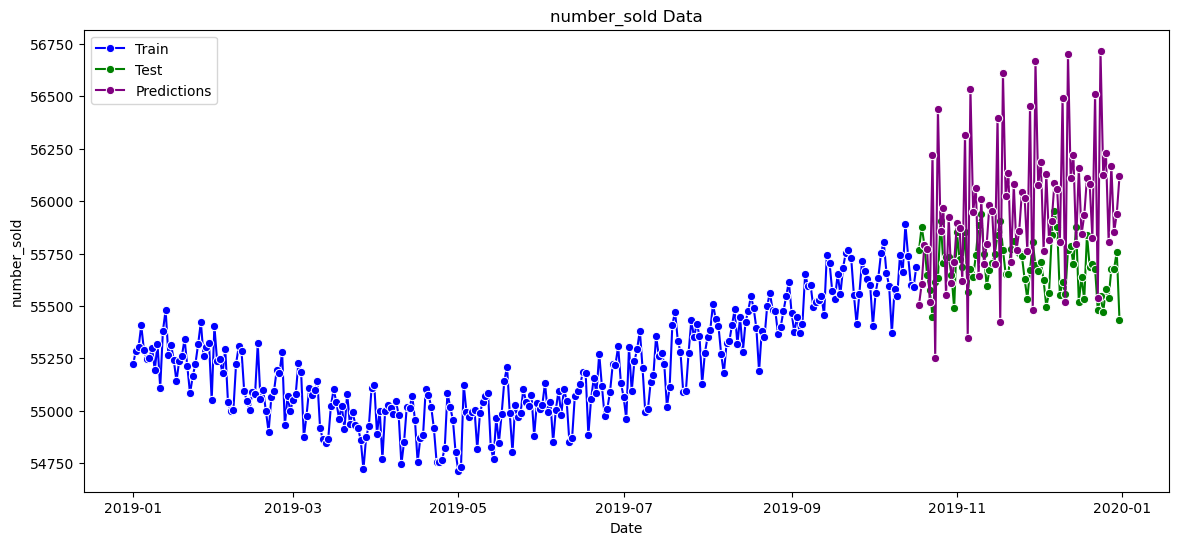

In [139]:
# Plot the time series data with the train-test split and the testing data predictions
plt.figure(figsize = (14, 6))
sns.lineplot(data = df_train, x = 'Date', y = 'number_sold', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = df_test, x = 'Date', y = 'number_sold', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[train_len:], y = df_preds.values[train_len:], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('number_sold Data');

In [141]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = df_test['number_sold'], y_pred = df_preds.values[train_len:]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,138.37
ARIMA,432.57
SARIMA,440.39
